In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange


x_initial = 1.0

# @njit
# def mapping(xn, b) -> float:
#     return b * (1 - xn ** 2 + (xn ** 4) / 4)

@njit
def mapping(xn, b) -> float:
    return b * xn * (1 - xn)

In [2]:
@njit
def get_mapping_graph_data(x0: float, b: float, n: int) -> np.array:
    xn_array = np.zeros(n)
    xn_array[0] = x0

    for i in range(1, n):
        xn_array[i] = mapping(xn_array[i-1], b)
    return xn_array

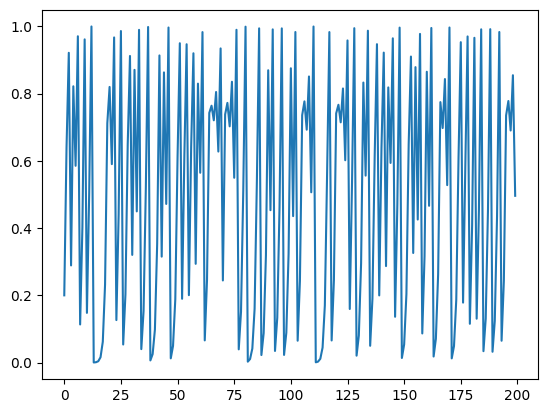

In [4]:
data = get_mapping_graph_data(0.2, 4, 200)
x_array = np.arange(200)
plt.plot(x_array, data)

In [5]:
import types
from numba.extending import overload


@overload(np.array)
def np_array_ol(x):
    if isinstance(x, types.Array):
        def impl(x):
            return np.copy(x)
    return impl

@njit(parallel = True, cache = False)
def make_bifrucation_diagram_for_mapping(x0: float):
    b_array = np.arange(0,4,0.001)
    xn_array = np.zeros((len(b_array), len(b_array)))

    for i in prange(len(b_array)):
        xn_data = get_mapping_graph_data(x0, b_array[i], 300)
        xn_data_set = np.array([*set(xn_data[-100:-1])])
        xn_array[i][:len(xn_data_set)] = xn_data_set
    # print(xn_array)
    return xn_array

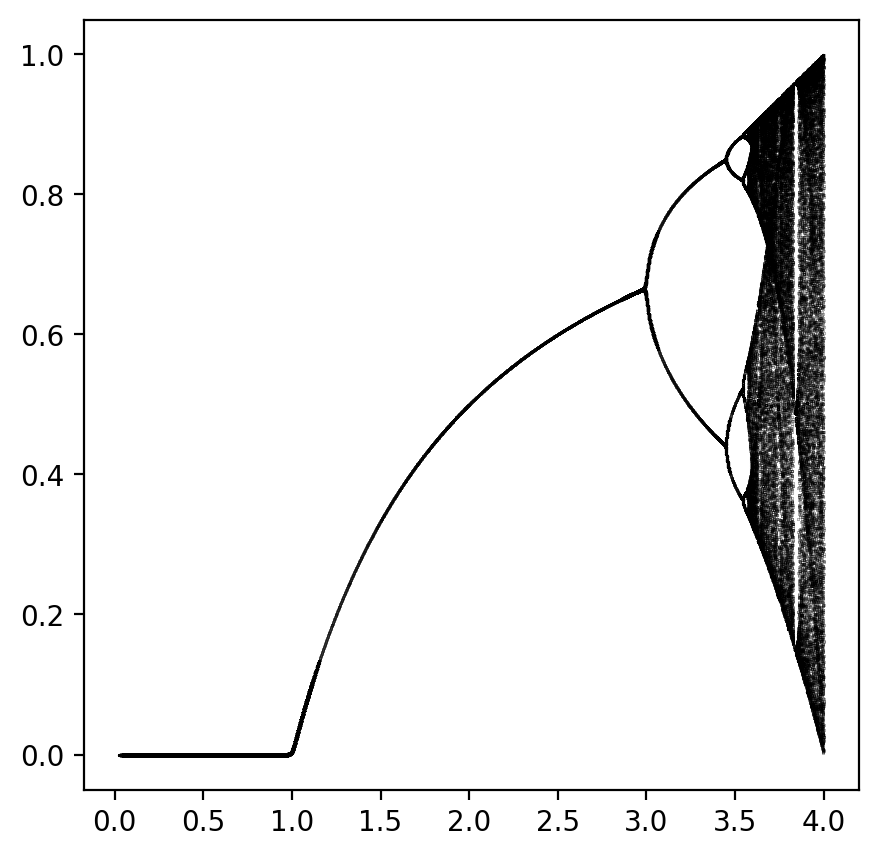

In [6]:
y_data = make_bifrucation_diagram_for_mapping(0.5)
x_data = np.arange(0, 4, 0.001)
plt.figure(figsize=(5, 5), dpi=200)
for x, y in zip(x_data, y_data):
    y = y[y != 0]
    plt.scatter([x] * len(y), y, s=0.01, color='black')